<a href="https://colab.research.google.com/github/ujjawal61/WDL/blob/main/challenge3_submission_v01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

## Introduction


## Development

### Initialize

In [52]:
# Mount the drive folder
from google.colab import drive # to load data from google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os # For files operations
import warnings
import itertools
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
import urllib.request # For download from url
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import csv # to import data in txt files
from datetime import datetime

In [54]:
# to use Panda profilling
# See the output to NULL for notebook readibility
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip > NULL
from pandas_profiling import ProfileReport

In [55]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

In [56]:
# Seaborn plot shortcuts
def boxplot(data, x, y, title = ""):
    
    """
    This function generates a seaborn boxplot with my defaults parameters.

    Parameters:
        title (string) title of the plot, default is empty
        data (df) the data frame
        x (panda serie) the x axis
        y (panda serie) the y axis
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    plt.title(title)
    plt.ioff()

def countplot(data, variable, title = ""):
    """
    This function contains my favourite parameters for the seaborn coutplot plot
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=data, x=variable)
    plt.title(title)
    plt.ioff()

In [57]:
# Set up the path for the data and output folders
PATH = "/content/drive/MyDrive/Data_science/WDL/Stage3/"
data = PATH + "Data"
output = PATH + "Output"

os.listdir(data)

['bike_loans.csv',
 'data_dict.csv',
 'station_location_with_id.csv',
 'medellin_bus_routes',
 'medellin_metro_stations',
 'bike_loans_merged.csv']

### Exploratory Data Analysis

In [58]:
file = data + "/" + "bike_loans_merged.csv"
df=pd.read_csv(file) #read the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225355 entries, 0 to 14225354
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   Loan_ID                           int64  
 2   User_ID                           int64  
 3   Bike_Tag_ID                       object 
 4   Loan_start_date_time              object 
 5   Loan_stop_date_time               object 
 6   Origin_loan_station_ID            int64  
 7   Position_number_bike_origin       int64  
 8   Return_loan_station_ID            float64
 9   Position_number_bike_destination  float64
 10  operator_presence                 object 
 11  Origin_station_description        object 
 12  origin_station_slots              float64
 13  origin_station_short_name         object 
 14  Origin_Lat                        object 
 15  Origin_Lon                        object 
 16  Origin_isManual                   

**The number of observation in this dataset is large. It caused out of memory issues while running the analysis on Google Collab pro.
To develop a proof of concept model using the computing resources available, we decided to randomly select 10% of the dataset for further analysis at this time.**

In [59]:
# Drop NaN values
df = df.dropna()

# Select 10% of the dataset
df = df.sample(frac=0.10)

# Save the samples data frame
file = data + "/" + "sample_bike_loans_merged.csv"
df.to_csv(file, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329383 entries, 0 to 1329382
Data columns (total 23 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Unnamed: 0                        1329383 non-null  int64  
 1   Loan_ID                           1329383 non-null  int64  
 2   User_ID                           1329383 non-null  int64  
 3   Bike_Tag_ID                       1329383 non-null  object 
 4   Loan_start_date_time              1329383 non-null  object 
 5   Loan_stop_date_time               1329383 non-null  object 
 6   Origin_loan_station_ID            1329383 non-null  int64  
 7   Position_number_bike_origin       1329383 non-null  int64  
 8   Return_loan_station_ID            1329383 non-null  float64
 9   Position_number_bike_destination  1329383 non-null  float64
 10  operator_presence                 1329383 non-null  object 
 11  Origin_station_description        132

In [ ]:
# Checkpoint load the new dataset
df=pd.read_csv(file) #read the data
df.info()

In [60]:
df.head()

,Unnamed: 0,Loan_ID,User_ID,Bike_Tag_ID,Loan_start_date_time,Loan_stop_date_time,Origin_loan_station_ID,Position_number_bike_origin,Return_loan_station_ID,Position_number_bike_destination,operator_presence,Origin_station_description,origin_station_slots,origin_station_short_name,Origin_Lat,Origin_Lon,Origin_isManual,Return_station_description,return_station_slots,return_station_short_name,Return_Lat,Return_Lon,Return_isManual
0,2309120,1224740,16612,SA23,2015-11-19 07:17:56.000,2015-11-19 07:21:59.000,27,1,28.0,1.0,Present,Sabaneta Parque,1.0,SPQ,"6,151631","-75,615623",1.0,Sabaneta Metro,1.0,SMT,"6,1568288","-75,616668",1.0
1,5571904,8072708,95087,000017AFBE15,2018-02-27 10:20:57.000,2018-02-27 10:23:32.000,64,13,59.0,21.0,Absent,MAMM,38.0,MUM,"6,22378","-75,574966",0.0,Río Aburrá,26.0,BCO,"6,22851","-75,574658",0.0
2,125768,4914381,44571,000017AFBBCF,2016-10-21 18:11:45.000,2016-10-21 18:26:48.000,60,25,36.0,28.0,Absent,Villa Carlota,26.0,VCA,"6,220012","-75,575431",0.0,Parque de Las Luces I,28.0,CIS,"6,246078","-75,571561",0.0
3,12627185,15556172,139715,0000EC016FE2,2020-05-09 11:12:55.000,2020-05-09 11:35:38.000,12,1,89.0,14.0,Absent,Floresta,20.0,FLO,"6,258628","-75,597366",1.0,Málaga,20.0,MLG,"6,24655","-75,569954",0.0
4,9049839,11604612,92632,003567222B5E,2019-04-25 06:22:21.000,2019-04-25 06:42:15.000,66,1,47.0,20.0,Absent,Industriales Metroplús,20.0,IMP,"6,231406","-75,577222",1.0,Circular Primera,24.0,CRP,"6,241859","-75,591929",0.0


In [61]:
df.tail()

,Unnamed: 0,Loan_ID,User_ID,Bike_Tag_ID,Loan_start_date_time,Loan_stop_date_time,Origin_loan_station_ID,Position_number_bike_origin,Return_loan_station_ID,Position_number_bike_destination,operator_presence,Origin_station_description,origin_station_slots,origin_station_short_name,Origin_Lat,Origin_Lon,Origin_isManual,Return_station_description,return_station_slots,return_station_short_name,Return_Lat,Return_Lon,Return_isManual
1329378,6590302,9116840,112945,0000190C583F,2018-07-09 05:29:34.000,2018-07-09 05:46:32.000,2,1,64.0,29.0,Absent,Universidad,33.0,UNI,"6,269267","-75,5653",1.0,MAMM,38.0,MUM,"6,22378","-75,574966",0.0
1329379,8727385,11276830,116806,006B91222B5E,2019-03-20 20:51:58.000,2019-03-20 21:13:21.000,70,1,8.0,1.0,Present,Campus Nacional,33.0,NAC,"6,260703","-75,57858",1.0,Estadio,20.0,EST,"6,253349","-75,587692",1.0
1329380,13767223,16781824,142327,00005B1D8DC7,2021-01-25 15:33:37.000,2021-01-25 15:35:45.000,90,13,90.0,14.0,Absent,Calle 51 Los Colores,40.0,C51,"6,26337958","-75,59509188",0.0,Calle 51 Los Colores,40.0,C51,"6,26337958","-75,59509188",0.0
1329381,4081655,6383321,97407,000017AFE676,2017-06-02 13:43:06.000,2017-06-02 13:47:36.000,46,1,8.0,1.0,Present,María Mulata,24.0,FNU,"6,250549","-75,594719",0.0,Estadio,20.0,EST,"6,253349","-75,587692",1.0
1329382,6906106,9431967,114500,0000190C99DE,2018-08-16 17:23:12.000,2018-08-16 17:30:38.000,10,1,49.0,5.0,Absent,UPB,12.0,UPB,"6,244998","-75,589188",1.0,Pedro Nel Gómez,26.0,NTB,"6,246906","-75,596625",0.0


In [62]:
# Exclude non-useful variables

df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Loan_ID',axis=1)
df = df.drop('User_ID',axis=1)
df = df.drop('origin_station_short_name',axis=1)
df = df.drop('return_station_short_name',axis=1)

df.head()

,Bike_Tag_ID,Loan_start_date_time,Loan_stop_date_time,Origin_loan_station_ID,Position_number_bike_origin,Return_loan_station_ID,Position_number_bike_destination,operator_presence,Origin_station_description,origin_station_slots,Origin_Lat,Origin_Lon,Origin_isManual,Return_station_description,return_station_slots,Return_Lat,Return_Lon,Return_isManual
0,SA23,2015-11-19 07:17:56.000,2015-11-19 07:21:59.000,27,1,28.0,1.0,Present,Sabaneta Parque,1.0,"6,151631","-75,615623",1.0,Sabaneta Metro,1.0,"6,1568288","-75,616668",1.0
1,000017AFBE15,2018-02-27 10:20:57.000,2018-02-27 10:23:32.000,64,13,59.0,21.0,Absent,MAMM,38.0,"6,22378","-75,574966",0.0,Río Aburrá,26.0,"6,22851","-75,574658",0.0
2,000017AFBBCF,2016-10-21 18:11:45.000,2016-10-21 18:26:48.000,60,25,36.0,28.0,Absent,Villa Carlota,26.0,"6,220012","-75,575431",0.0,Parque de Las Luces I,28.0,"6,246078","-75,571561",0.0
3,0000EC016FE2,2020-05-09 11:12:55.000,2020-05-09 11:35:38.000,12,1,89.0,14.0,Absent,Floresta,20.0,"6,258628","-75,597366",1.0,Málaga,20.0,"6,24655","-75,569954",0.0
4,003567222B5E,2019-04-25 06:22:21.000,2019-04-25 06:42:15.000,66,1,47.0,20.0,Absent,Industriales Metroplús,20.0,"6,231406","-75,577222",1.0,Circular Primera,24.0,"6,241859","-75,591929",0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329383 entries, 0 to 1329382
Data columns (total 18 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Bike_Tag_ID                       1329383 non-null  object 
 1   Loan_start_date_time              1329383 non-null  object 
 2   Loan_stop_date_time               1329383 non-null  object 
 3   Origin_loan_station_ID            1329383 non-null  int64  
 4   Position_number_bike_origin       1329383 non-null  int64  
 5   Return_loan_station_ID            1329383 non-null  float64
 6   Position_number_bike_destination  1329383 non-null  float64
 7   operator_presence                 1329383 non-null  object 
 8   Origin_station_description        1329383 non-null  object 
 9   origin_station_slots              1329383 non-null  float64
 10  Origin_Lat                        1329383 non-null  object 
 11  Origin_Lon                        132

In [64]:
# This code created an out of mermory issue on Google Colab Pro even with High Memory env. for the full dataset

report = ProfileReport(df, minimal=True)
# Display the report
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Target Variable Distribution

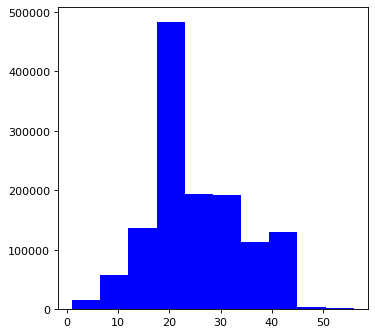

In [65]:
# Target Variable distribution: origin_station_slots
plt.figure(figsize=(5, 5), dpi=80)
plt.hist(df['origin_station_slots'], color='blue')
plt.show()

#### Independent variables distributions

In [66]:
# Bike_Tag_ID
df.Bike_Tag_ID.value_counts()

000017AFE936    970
000017B0065A    961
000017AFD5F6    956
000017AFD2ED    953
000017B022D6    949
               ... 
0000569B5A88      1
0000ECAD7038      1
256               1
000DB9222B5E      1
00003F60DDE2      1
Name: Bike_Tag_ID, Length: 6606, dtype: int64

In [67]:
# Origin_loan_station_ID
df.Origin_loan_station_ID.value_counts()

8      75855
7      56368
12     48698
3      46353
2      43228
       ...  
138       55
121       54
136       50
129       41
142       17
Name: Origin_loan_station_ID, Length: 106, dtype: int64

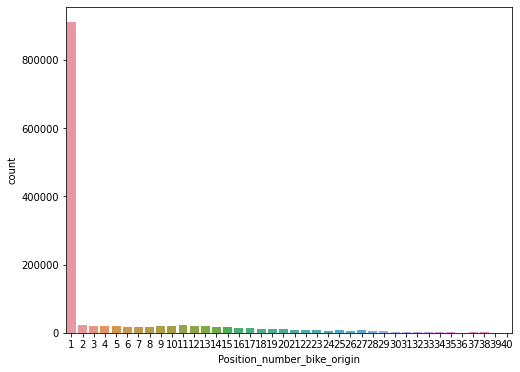

In [68]:
# Position_number_bike_origin
countplot(df, 'Position_number_bike_origin')

In [69]:
# Return_loan_station_ID
df.Return_loan_station_ID.value_counts()

8.0      70684
7.0      54884
12.0     53345
3.0      47417
2.0      42712
         ...  
133.0       59
138.0       59
136.0       57
129.0       41
142.0       16
Name: Return_loan_station_ID, Length: 106, dtype: int64

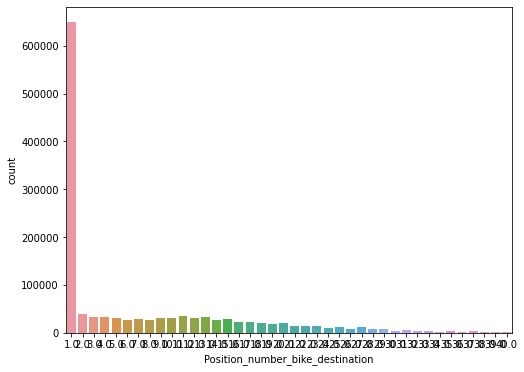

In [70]:
# Position_number_bike_destination
countplot(df, 'Position_number_bike_destination')

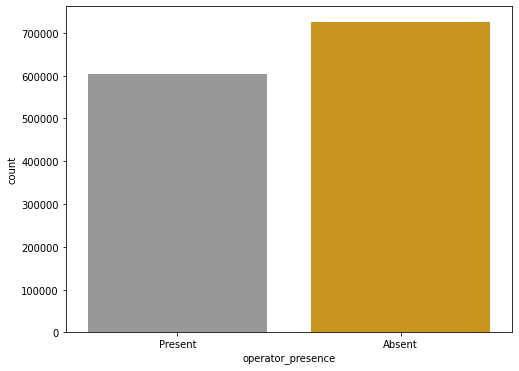

In [71]:
# Return_loan_station_ID 
countplot(df, 'operator_presence')

In [72]:
# Origin_station_description
df.Origin_station_description.value_counts()

Estadio                   75855
Suramericana              56368
Floresta                  48698
Ruta N                    46353
Universidad               43228
                          ...  
Los Naranjos                 55
Las Vegas 69 Sur             54
Metróplus Cami               50
Puerta La 77 Sur             41
Puente pan de Queso II       17
Name: Origin_station_description, Length: 106, dtype: int64

In [73]:
# Origin_Lat
df.Origin_Lat.value_counts()

6,253349      75855
6,253003      56368
6,258628      48698
6,265182      46353
6,269267      43228
              ...  
6,17191566       55
6,154112         54
6,17485965       50
6,152422         41
6,17547831       17
Name: Origin_Lat, Length: 105, dtype: int64

In [74]:
# Origin_Lon
df.Origin_Lon.value_counts()

-75,587692      75855
-75,582687      56368
-75,597366      48698
-75,566348      46353
-75,5653        43228
                ...  
-75,60698748       55
-75,616959         54
-75,60941756       50
-75,624636         41
-75,59662074       17
Name: Origin_Lon, Length: 106, dtype: int64

### Benchmark model: Random Forest Regressor

In [75]:
# Drop the date for the simple benchmark model
df = df.drop('Loan_start_date_time',axis=1)
df = df.drop('Loan_stop_date_time',axis=1)

In [76]:
df.head()

,Bike_Tag_ID,Origin_loan_station_ID,Position_number_bike_origin,Return_loan_station_ID,Position_number_bike_destination,operator_presence,Origin_station_description,origin_station_slots,Origin_Lat,Origin_Lon,Origin_isManual,Return_station_description,return_station_slots,Return_Lat,Return_Lon,Return_isManual
0,SA23,27,1,28.0,1.0,Present,Sabaneta Parque,1.0,"6,151631","-75,615623",1.0,Sabaneta Metro,1.0,"6,1568288","-75,616668",1.0
1,000017AFBE15,64,13,59.0,21.0,Absent,MAMM,38.0,"6,22378","-75,574966",0.0,Río Aburrá,26.0,"6,22851","-75,574658",0.0
2,000017AFBBCF,60,25,36.0,28.0,Absent,Villa Carlota,26.0,"6,220012","-75,575431",0.0,Parque de Las Luces I,28.0,"6,246078","-75,571561",0.0
3,0000EC016FE2,12,1,89.0,14.0,Absent,Floresta,20.0,"6,258628","-75,597366",1.0,Málaga,20.0,"6,24655","-75,569954",0.0
4,003567222B5E,66,1,47.0,20.0,Absent,Industriales Metroplús,20.0,"6,231406","-75,577222",1.0,Circular Primera,24.0,"6,241859","-75,591929",0.0


In [77]:
# Drop NaN values
df = df.dropna()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329383 entries, 0 to 1329382
Data columns (total 16 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Bike_Tag_ID                       1329383 non-null  object 
 1   Origin_loan_station_ID            1329383 non-null  int64  
 2   Position_number_bike_origin       1329383 non-null  int64  
 3   Return_loan_station_ID            1329383 non-null  float64
 4   Position_number_bike_destination  1329383 non-null  float64
 5   operator_presence                 1329383 non-null  object 
 6   Origin_station_description        1329383 non-null  object 
 7   origin_station_slots              1329383 non-null  float64
 8   Origin_Lat                        1329383 non-null  object 
 9   Origin_Lon                        1329383 non-null  object 
 10  Origin_isManual                   1329383 non-null  float64
 11  Return_station_description        132

In [79]:
df['Bike_Tag_ID'] = df['Bike_Tag_ID'].astype(str)
df['Origin_station_description'] = df['Origin_station_description'].astype(str)
df['Origin_Lat'] = df['Origin_Lat'].astype(str)
df['Origin_Lon'] = df['Origin_Lon'].astype(str)
df['Return_Lat'] = df['Return_Lat'].astype(str)
df['Return_Lon'] = df['Return_Lon'].astype(str)
df['Return_station_description'] = df['Return_station_description'].astype(str)

In [80]:
# Encoding of the categorical variables
# https://www.hackdeploy.com/python-one-hot-encoding-with-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

from sklearn.preprocessing import LabelEncoder

le_Bike_Tag_ID = LabelEncoder()
le_Origin_loan_station_ID = LabelEncoder()
le_Position_number_bike_origin = LabelEncoder()
le_Return_loan_station_ID = LabelEncoder()
le_Position_number_bike_destination = LabelEncoder()
le_operator_presence = LabelEncoder()
le_Origin_station_description = LabelEncoder()
le_Origin_Lat = LabelEncoder()
le_Origin_Lon = LabelEncoder()
le_Origin_isManual = LabelEncoder()
le_Return_station_description = LabelEncoder()
le_return_station_slots = LabelEncoder()
le_Return_Lat = LabelEncoder() 
le_Return_Lon = LabelEncoder()
le_Return_isManual = LabelEncoder()

df['Bike_Tag_ID'] = le_Bike_Tag_ID.fit_transform(df.Bike_Tag_ID)
df['Origin_loan_station_ID'] = le_Origin_loan_station_ID.fit_transform(df.Origin_loan_station_ID)
df['Position_number_bike_origin'] = le_Position_number_bike_origin.fit_transform(df.Position_number_bike_origin)
df['Return_loan_station_ID'] = le_Return_loan_station_ID.fit_transform(df.Return_loan_station_ID)
df['Position_number_bike_destination'] = le_Position_number_bike_destination.fit_transform(df.Position_number_bike_destination)
df['operator_presence'] = le_operator_presence.fit_transform(df.operator_presence)
df['Origin_station_description'] = le_Origin_station_description.fit_transform(df.Origin_station_description)
df['Origin_Lat'] = le_Origin_Lat.fit_transform(df.Origin_Lat)
df['Origin_Lon'] = le_Origin_Lon.fit_transform(df.Origin_Lon)
df['Origin_isManual'] = le_Origin_isManual.fit_transform(df.Origin_isManual)
df['Return_station_description'] = le_Return_station_description.fit_transform(df.Return_station_description)
df['return_station_slots'] = le_return_station_slots.fit_transform(df.return_station_slots)
df['Return_Lat'] = le_Return_Lat.fit_transform(df.Return_Lat)
df['Return_Lon'] = le_Return_Lon.fit_transform(df.Return_Lon)
df['Return_isManual'] = le_Return_isManual.fit_transform(df.Return_isManual)

df.head()

,Bike_Tag_ID,Origin_loan_station_ID,Position_number_bike_origin,Return_loan_station_ID,Position_number_bike_destination,operator_presence,Origin_station_description,origin_station_slots,Origin_Lat,Origin_Lon,Origin_isManual,Return_station_description,return_station_slots,Return_Lat,Return_Lon,Return_isManual
0,6552,18,0,19,0,1,85,1.0,5,97,1,84,0,11,99,1
1,956,50,12,45,20,0,38,38.0,44,22,0,82,11,46,20,0
2,946,46,24,24,27,0,101,26.0,39,24,0,59,13,75,11,0
3,4131,10,0,55,13,0,22,20.0,92,83,1,48,7,76,8,0
4,4705,52,0,35,19,0,28,20.0,49,28,1,12,10,59,60,0


In [81]:
# Separate into variables and target variable
selected_variables = ['Bike_Tag_ID',
                      'Origin_loan_station_ID',
                      'Position_number_bike_origin',
                      'Return_loan_station_ID',
                      'Position_number_bike_destination',
                      'operator_presence',
                      'Origin_station_description',
                      'Origin_Lat',
                      'Origin_Lon',
                      'Origin_isManual',
                      'Return_station_description',
                      'return_station_slots',
                      'Return_Lat',
                      'Return_Lon',
                      'Return_isManual']

X= df.loc[:,selected_variables].values

In [82]:
# Separate into variables and target variable
y=df.loc[:,'origin_station_slots'].values

In [83]:
# Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [84]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [85]:
y_pred_rfr=reg.predict(X_test)

In [87]:
print(f"The MSE of the test data set : {mean_squared_error(y_test,y_pred_rfr)}")

The MSE of the test data set : 51.10797480229492


In [88]:
# Use Grid Search to improve (minimize) the MSE score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor as DT
dt=DT()
max_depth=[x for x in range(1,5)]
param_grid=dict(max_depth=max_depth)
searcher=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
searcher.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [89]:
searcher.best_estimator_.fit(X_train,y_train)
y_pred_dt=searcher.best_estimator_.predict(X_test)
print(f"The MSE of the test data set : {mean_squared_error(y_pred_dt,y_test)}")

The MSE of the test data set : 30.020952098185298


## Conclusions

### Scalability and Impact

### Future Work